In [1]:
import matplotlib.pyplot as plt 
import numpy as np

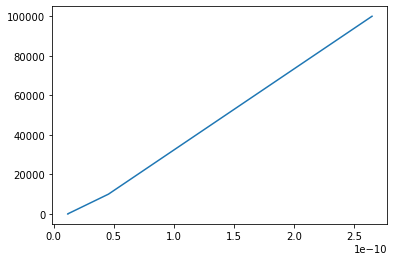

In [2]:
R = np.array([1e3,10e3,100e3])
R3 = np.array([1,10,100,1e3,10e3,100e3])
V = np.array([.048,.15,.85]) # vout 
V3 = np.array([.038,0.038,.039,.049,.148,.859])
V_j = (10/(300*600)**2)*V
V_j3 = (10/(300*600)**2) * V3

#plt.plot(V,R) 
plt.plot(V_j3,R3)

In [3]:
print(V_j)
print(R)

print("\n",V_j3)
print(R3)

[1.48148148e-11 4.62962963e-11 2.62345679e-10]
[  1000.  10000. 100000.]

 [1.17283951e-11 1.17283951e-11 1.20370370e-11 1.51234568e-11
 4.56790123e-11 2.65123457e-10]
[1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]


<ipython-input-4-7813b4be70d6>:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,2e5)


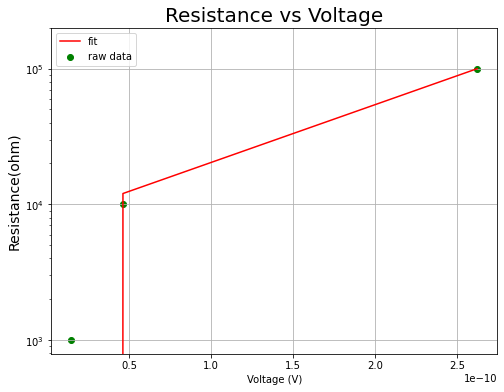

[ 4.06034096e+14 -6.77816175e+03]


In [4]:
# linear fit for dataset1 

import scipy.optimize as optimize

def linFit (x,m,b): 
    y = m*x+b
    return y

# Scipy Optimize function 
linfit, linErr = optimize.curve_fit(linFit,V_j,R,p0 = [2e14,0.25])

 # y-values for optimized fit 
optimized_linfit = linFit(V_j,linfit[0],linfit[1])

plt.figure(figsize = (8,6))
plt.scatter(V_j,R,label = 'raw data',color = 'g')
plt.plot(V_j,optimized_linfit,'r',label='fit')
plt.title('Resistance vs Voltage',fontsize = 20)
plt.ylabel('Resistance(ohm)',fontsize = 14)
plt.xlabel('Voltage (V)')
plt.legend(loc = 'upper left')
plt.yscale('log')
plt.ylim(0,2e5)
plt.grid()
plt.show()
print(linfit)

# Part B Data Analysis 

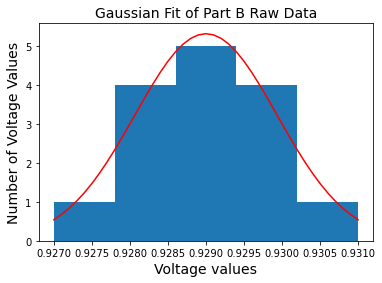

[5.32151681e+00 9.29000000e-01 9.35213923e-04]


In [5]:
dp_partb = np.array([.927,.929,.928,.929,.929,.930,.929,.931,.928,.930,.928,.930,.930,.929,.928])


x_height, x_bin = np.histogram(dp_partb,bins = 5) # 5 
bin_center = (x_bin[1:] + x_bin[:-1])/2

# Apply Gaussian Fit 
def Gauss(x,a,b,c): # b equals the mean 
    return a * np.exp(-(x-b)**2/(2*c**2))

pfitb, pErrb = optimize.curve_fit(Gauss,bin_center,x_height,p0 = [5,.92,.01]) 

xpoints = np.arange(0.927,0.931,0.0001)
p_opt_fitb = Gauss(xpoints,*pfitb)
plt.hist(dp_partb,bins = 5)
#plt.plot(bin_center,x_height)
plt.plot(xpoints,p_opt_fitb,'r')
plt.title('Gaussian Fit of Part B Raw Data', fontsize = 14)
plt.xlabel('Voltage values',fontsize = 14)
plt.ylabel('Number of Voltage Values', fontsize = 14)
plt.savefig('PartB_Gaussian_Fit.png')
plt.show()

print(pfitb)


# Average $V_{meter} = .9290 \pm .0009~V$

## Part C: Data Analysis 

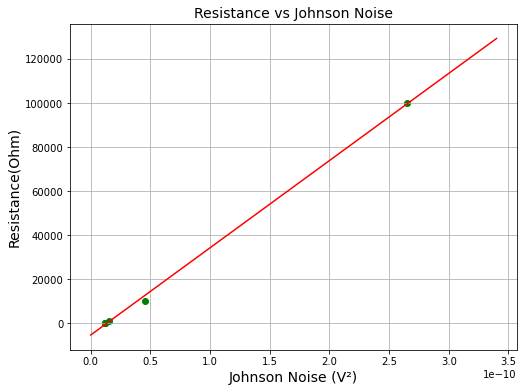

[ 3.95915077e+14 -5.33008820e+03]
[[6.71289584e+12            nan]
 [           nan 7.40580499e+02]]


<ipython-input-7-6324f805d074>:23: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(linErr3))


In [7]:
 # linear fit for dataset3 

# Scipy Optimize function 
linfit3, linErr3 = optimize.curve_fit(linFit,V_j3,R3,p0 = [1e14,0.25])

 # y-values for optimized fit 
optimized_linfit3 = linFit(np.arange(0,3.5e-10,1e-11),*linfit3)

plt.figure(figsize = (8,6))
plt.scatter(V_j3,R3,color = 'g')
plt.plot(np.arange(0,3.5e-10,1e-11),optimized_linfit3,'r')
plt.title('Resistance vs Johnson Noise',fontsize = 14)
plt.ylabel('Resistance(Ohm)',fontsize = 14)
plt.xlabel('Johnson Noise (V²)', fontsize = 14)
#plt.legend(loc = 'upper left')
#plt.text(2.5,6000,'m = 3.95e+14', fontsize = 12 )
plt.savefig('PartC_Linear_Fit.png')
plt.grid()

plt.show()
#plt.text(2.5,6000,'m = 3.95e+14', fontsize = 12 )
print(linfit3)
print(np.sqrt(linErr3))

# Part D: Data Analysis 

In [8]:
# Data recorded in arrays 

Vm = np.array([.856,.333,.312,.106,.095,.075,.034,.030])
# Convert Vm into <V_j(t)^2> 
V_jp4 = (10/(300*600)**2)*Vm
bw = np.array([99.9e3,32e3,30e3,9990,9e3,7e3,3290,3e3])

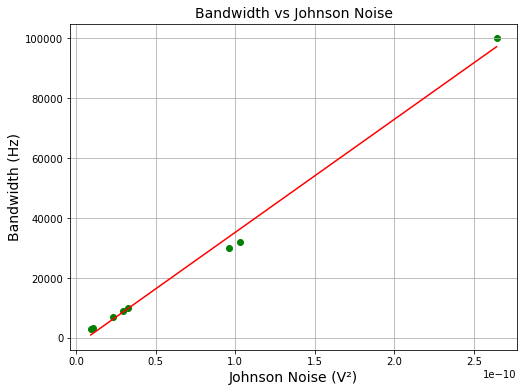

[ 3.77244896e+14 -2.52178465e+03]
[[1.24816043e+13            nan]
 [           nan 1.34067140e+03]]


<ipython-input-9-23c14a0bdccd>:17: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(p4err))


In [9]:
# Scipy Optimize function 

p4fit, p4err = optimize.curve_fit(linFit,V_jp4,bw,p0 = [5e5,3.2])
 # y-values for optimized fit 
optimized_linfitp4 = linFit(V_jp4,*p4fit)

plt.figure(figsize = (8,6))
plt.scatter(V_jp4,bw,label = 'raw data',color = 'g')
plt.plot(V_jp4,optimized_linfitp4,'r',label='fit')
plt.title('Bandwidth vs Johnson Noise',fontsize = 14)
plt.ylabel('Bandwidth (Hz)',fontsize = 14)
plt.xlabel('Johnson Noise (V²)', fontsize = 14) # what is the units of average voltage square ?  
plt.savefig('PartD_Linear_Fit.png')
plt.grid()
plt.show()
print(p4fit)
print(np.sqrt(p4err))

# Part E Data Analysis 

In [10]:
# Data collected 
Res = np.array([10,10e3,100e3])
# data collection for voltage at 340 K and @ 9kHz bw 
Vm_340_rem = np.array([.004,.017,.082]) 
Vm_340_loc = np.array([.001,.011,.096])

# data collection for voltage at 390 K and @ 9kHz
Vm_390_rem = np.array([.005,.017,.092])
Vm_390_loc = np.array([.002,.011,.095])

# data collection for voltage at 270 K and @ 9kHz 
Vm_270_rem = np.array([.005,.013,.053])
Vm_270_loc = np.array([.001,.010,.096])

# data collection for voltage at room temperature and @ 9kHz 
Vm_RT_rem = np.array([.004,.014,.072])
Vm_RT_loc = np.array([.001,.011,.095])


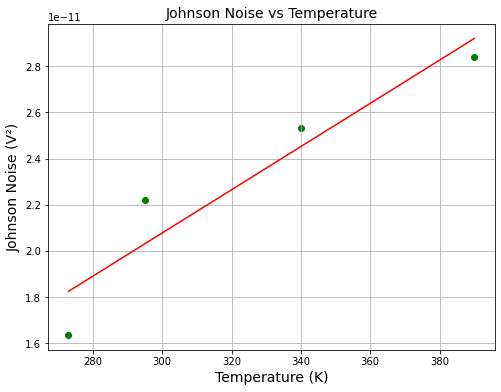

[ 9.36503991e-14 -7.31856685e-12]
[[2.29852174e-14            nan]
 [           nan 7.52966748e-12]]


<ipython-input-19-f102644aa5e4>:22: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(perr_V100k))


In [19]:
# Plot of temperature dependence for 100 ohm remote resistance 

V100k = np.array([.053,.072,.082,.092]) * (10/(300*600)**2) # Voltage across 100k remote resistor 
T = np.array([273,295,340,390])

pfit_V100k, perr_V100k = optimize.curve_fit(linFit,T,V100k,p0 = [1,.0005])
 # y-values for optimized fit 
optimized_linfit_V100k = linFit(T,*pfit_V100k)

plt.figure(figsize = (8,6))
plt.scatter(T,V100k,color = 'g')
plt.plot(T,optimized_linfit_V100k,'r')
plt.title('Johnson Noise vs Temperature',fontsize = 14) # Johnson Noise measured across 100k Remote resistor 
plt.ylabel('Johnson Noise (V²)',fontsize = 14)
plt.xlabel('Temperature (K)', fontsize = 14) 
plt.savefig('PartE_Linear_Fit.png')
plt.grid()
plt.show()


print(pfit_V100k)
print(np.sqrt(perr_V100k))


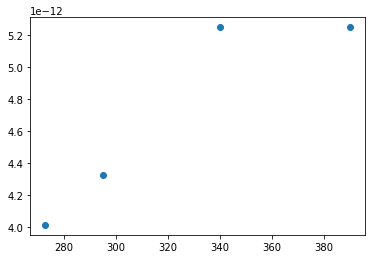

In [12]:
V10k = np.array([.013,.014,.017,.017]) * (10/((300*600)**2))
plt.scatter(T,V10k)

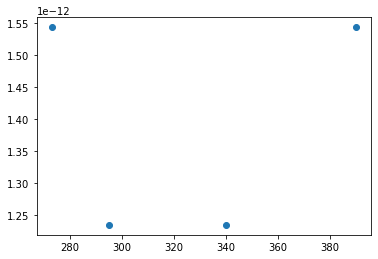

In [13]:
V10 = np.array([.005,.004,.004,.005]) * (10/(300*600)**2)
plt.scatter(T,V10)

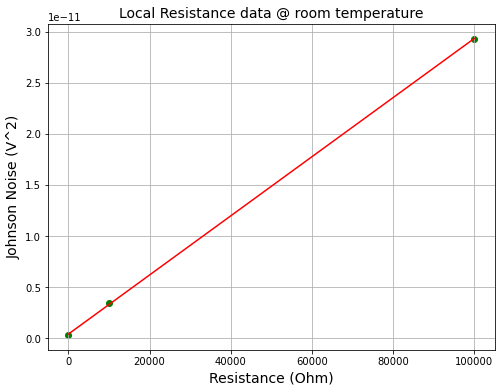

Fit Parameters for local data: [2.89326790e-16 3.98617081e-13]


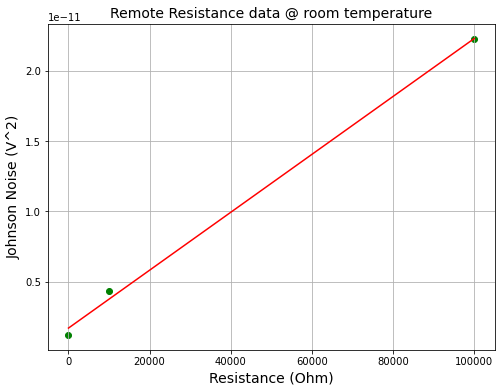

Fit Parameters for local data: [2.05546822e-16 1.72185729e-12]


In [15]:
# room temperature plot @ 9 kHz for remote and local resistors 

# converted Voltage meter voltage to average voltage square 

Vj2_RT_rem = (10/(300*600)**2) * Vm_RT_rem 
Vj2_RT_loc = (10/(300*600)**2) * Vm_RT_loc 

pfit_Vj2_RT_loc, pErr_Vj2_RT_loc = optimize.curve_fit(linFit,Res,Vj2_RT_loc,p0 = [9.5e-7,3.2])
pfit_Vj2_RT_rem, pErr_Vj2_RT_rem = optimize.curve_fit(linFit,Res,Vj2_RT_rem,p0 = [7.8e-7,3.2])

 # y-values for optimized fit 
optimized_linfit_Vj2_RT_loc = linFit(Res,*pfit_Vj2_RT_loc)
optimized_linfit_Vj2_RT_rem = linFit(Res,*pfit_Vj2_RT_rem)

# local fit 
plt.figure(figsize = (8,6))

plt.scatter(Res,Vj2_RT_loc,color = 'g')
plt.plot(Res,optimized_linfit_Vj2_RT_loc,'r')
plt.title('Local Resistance data @ room temperature',fontsize = 14)
plt.ylabel('Johnson Noise (V^2)',fontsize = 14)
plt.xlabel('Resistance (Ohm)',fontsize = 14)  
plt.grid()
plt.show()

print("Fit Parameters for local data:",pfit_Vj2_RT_loc)
# remote fit 

plt.figure(figsize = (8,6))
plt.scatter(Res,Vj2_RT_rem,label = 'Remote raw data',color = 'g')
plt.plot(Res,optimized_linfit_Vj2_RT_rem,color = 'r')
plt.title('Remote Resistance data @ room temperature',fontsize = 14)
plt.ylabel('Johnson Noise (V^2)',fontsize = 14)
plt.xlabel('Resistance (Ohm)',fontsize = 14)  
plt.grid()
plt.show()

print("Fit Parameters for local data:",pfit_Vj2_RT_rem)

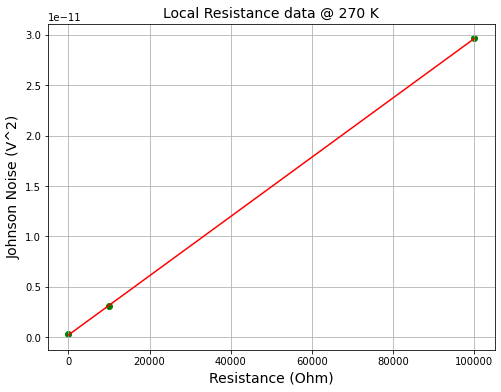

Fit Parameters for local data: [2.93906098e-16 2.30693846e-13]


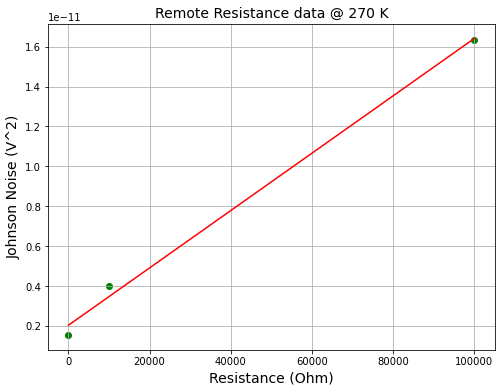

Fit Parameters for local data: [1.43814696e-16 2.03084184e-12]


In [16]:
# 270 K plot @ 9 kHz for remote and local resistors 

# converted Voltage meter voltage to average voltage square 

Vj2_270_rem = (10/(300*600)**2) * Vm_270_rem 
Vj2_270_loc = (10/(300*600)**2) * Vm_270_loc 

pfit_Vj2_270_loc, pErr_Vj2_270_loc = optimize.curve_fit(linFit,Res,Vj2_270_loc,p0 = [9.5e-7,3.2])
pfit_Vj2_270_rem, pErr_Vj2_270_rem = optimize.curve_fit(linFit,Res,Vj2_270_rem,p0 = [7.8e-7,3.2])

 # y-values for optimized fit 
optimized_linfit_Vj2_270_loc = linFit(Res,*pfit_Vj2_270_loc)
optimized_linfit_Vj2_270_rem = linFit(Res,*pfit_Vj2_270_rem)

# local fit 
plt.figure(figsize = (8,6))

plt.scatter(Res,Vj2_270_loc,color = 'g')
plt.plot(Res,optimized_linfit_Vj2_270_loc,'r')
plt.title('Local Resistance data @ 270 K',fontsize = 14)
plt.ylabel('Johnson Noise (V^2)',fontsize = 14)
plt.xlabel('Resistance (Ohm)',fontsize = 14)  
plt.grid()
plt.show()

print("Fit Parameters for local data:",pfit_Vj2_270_loc)

# remote fit 
plt.figure(figsize = (8,6))
plt.scatter(Res,Vj2_270_rem,label = 'Remote raw data',color = 'g')
plt.plot(Res,optimized_linfit_Vj2_270_rem,color = 'r')
plt.title('Remote Resistance data @ 270 K',fontsize = 14)
plt.ylabel('Johnson Noise (V^2)',fontsize = 14)
plt.xlabel('Resistance (Ohm)',fontsize = 14)  
plt.grid()
plt.show()

print("Fit Parameters for local data:",pfit_Vj2_270_rem)

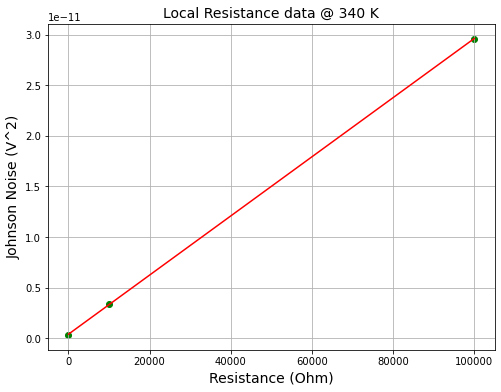

Fit Parameters for local data: [2.92549096e-16 3.83335756e-13]


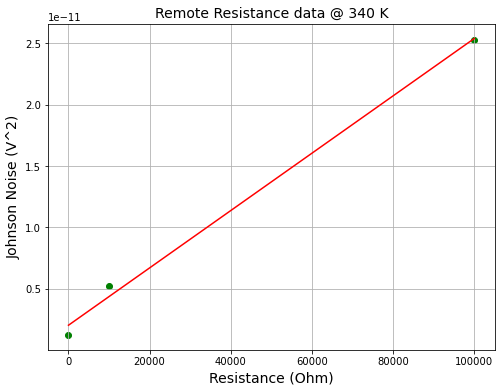

Fit Parameters for local data: [2.33698882e-16 2.02696983e-12]


In [17]:
# 340 K plot @ 9 kHz for remote and local resistors 

# converted Voltage meter voltage to average voltage square 

Vj2_340_rem = (10/(300*600)**2) * Vm_340_rem 
Vj2_340_loc = (10/(300*600)**2) * Vm_340_loc 

pfit_Vj2_340_loc, pErr_Vj2_340_loc = optimize.curve_fit(linFit,Res,Vj2_340_loc,p0 = [9.5e-7,3.2])
pfit_Vj2_340_rem, pErr_Vj2_340_rem = optimize.curve_fit(linFit,Res,Vj2_340_rem,p0 = [7.8e-7,3.2])

 # y-values for optimized fit 
optimized_linfit_Vj2_340_loc = linFit(Res,*pfit_Vj2_340_loc)
optimized_linfit_Vj2_340_rem = linFit(Res,*pfit_Vj2_340_rem)

# local fit 
plt.figure(figsize = (8,6))

plt.scatter(Res,Vj2_340_loc,color = 'g')
plt.plot(Res,optimized_linfit_Vj2_340_loc,'r')
plt.title('Local Resistance data @ 340 K',fontsize = 14)
plt.ylabel('Johnson Noise (V^2)',fontsize = 14)
plt.xlabel('Resistance (Ohm)', fontsize = 14)  
plt.grid()
plt.show()

print("Fit Parameters for local data:",pfit_Vj2_340_loc)

# remote fit 
plt.figure(figsize = (8,6))
plt.scatter(Res,Vj2_340_rem,label = 'Remote raw data',color = 'g')
plt.plot(Res,optimized_linfit_Vj2_340_rem,color = 'r')
plt.title('Remote Resistance data @ 340 K',fontsize = 14)
plt.ylabel('Johnson Noise (V^2)',fontsize = 14)
plt.xlabel('Resistance (Ohm)',fontsize = 14)  
plt.grid()
plt.show()

print("Fit Parameters for local data:",pfit_Vj2_340_rem)

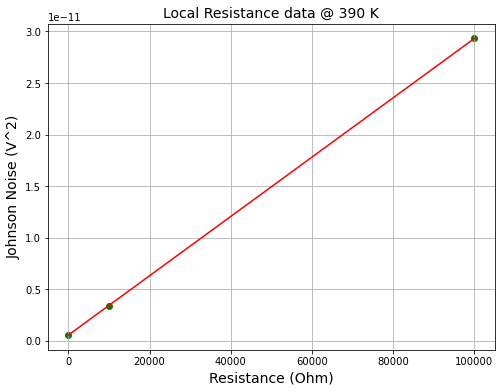

Fit Parameters for local data: [2.87461485e-16 5.69898462e-13]


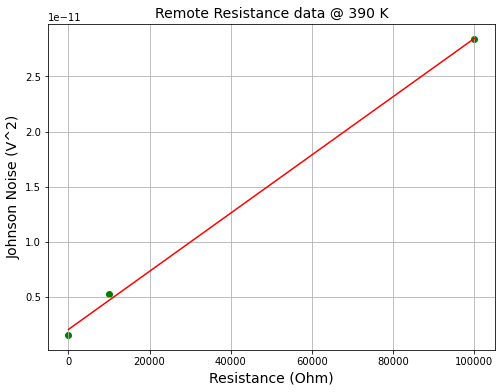

Fit Parameters for local data: [2.64056641e-16 2.04543802e-12]


In [18]:
# 390 K plot @ 9 kHz for remote and local resistors 

# converted Voltage meter voltage to average voltage square 

Vj2_390_rem = (10/(300*600)**2) * Vm_390_rem 
Vj2_390_loc = (10/(300*600)**2) * Vm_390_loc 

pfit_Vj2_390_loc, pErr_Vj2_390_loc = optimize.curve_fit(linFit,Res,Vj2_390_loc,p0 = [9.5e-7,3.2])
pfit_Vj2_390_rem, pErr_Vj2_390_rem = optimize.curve_fit(linFit,Res,Vj2_390_rem,p0 = [7.8e-7,3.2])

 # y-values for optimized fit 
optimized_linfit_Vj2_390_loc = linFit(Res,*pfit_Vj2_390_loc)
optimized_linfit_Vj2_390_rem = linFit(Res,*pfit_Vj2_390_rem)

# local fit 
plt.figure(figsize = (8,6))

plt.scatter(Res,Vj2_390_loc,color = 'g')
plt.plot(Res,optimized_linfit_Vj2_390_loc,'r')
plt.title('Local Resistance data @ 390 K',fontsize = 14)
plt.ylabel('Johnson Noise (V^2)',fontsize = 14)
plt.xlabel('Resistance (Ohm)',fontsize = 14)  
plt.grid()
plt.show()

print("Fit Parameters for local data:",pfit_Vj2_390_loc)

# remote fit 
plt.figure(figsize = (8,6))
plt.scatter(Res,Vj2_390_rem,color = 'g')
plt.plot(Res,optimized_linfit_Vj2_390_rem,color = 'r')
plt.title('Remote Resistance data @ 390 K',fontsize = 14)
plt.ylabel('Johnson Noise (V^2)',fontsize = 14)
plt.xlabel('Resistance (Ohm)', fontsize = 14)  
plt.grid()
plt.show()

print("Fit Parameters for local data:",pfit_Vj2_390_rem)